In [5]:
from pyevolve import G1DBinaryString
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import DBAdapters

%matplotlib inline

In [2]:
#fitness function
    
def fitness(chromosome):
    score = 0.0
    # iterate over the chromosome
    for value in chromosome:
        if value==1:
            score += 1
    return score

In [3]:
# Chromosome representation

# genome = bitstring
genome = G1DBinaryString.G1DBinaryString(20)

# how to compute the fitness
genome.evaluator.set(fitness)

# GA initialisation
ga = GSimpleGA.GSimpleGA(genome)
ga.setPopulationSize(100)
ga.setMutationRate(0.01)
ga.setCrossoverRate(0.9)
ga.selector.set(Selectors.GRouletteWheel)
ga.setElitism(True)

# Record evolution results in a database
sqlite_adapter = DBAdapters.DBSQLite(identify="log_bit-string")
ga.setDBAdapter(sqlite_adapter)

# Number of generations
ga.setGenerations(100)

# run the GA and print out stats every freq_stats generations
ga.evolve(freq_stats=10)

# Final best solution
print(ga.bestIndividual())

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [12.28(15.00)/8.42(6.00)/10.23(10.23)]
Gen. 10 (10.00%): Max/Min/Avg Fitness(Raw) [14.24(16.00)/8.50(6.00)/11.87(11.87)]
Gen. 20 (20.00%): Max/Min/Avg Fitness(Raw) [16.68(18.00)/11.26(10.00)/13.90(13.90)]
Gen. 30 (30.00%): Max/Min/Avg Fitness(Raw) [17.40(20.00)/12.13(10.00)/14.50(14.50)]
Gen. 40 (40.00%): Max/Min/Avg Fitness(Raw) [18.67(20.00)/13.06(12.00)/15.56(15.56)]
Gen. 50 (50.00%): Max/Min/Avg Fitness(Raw) [19.34(20.00)/12.70(12.00)/16.12(16.12)]
Gen. 60 (60.00%): Max/Min/Avg Fitness(Raw) [19.20(20.00)/12.80(12.00)/16.00(16.00)]
Gen. 70 (70.00%): Max/Min/Avg Fitness(Raw) [20.35(20.00)/11.43(12.00)/16.96(16.96)]
Gen. 80 (80.00%): Max/Min/Avg Fitness(Raw) [21.41(20.00)/9.85(13.00)/17.84(17.84)]
Gen. 90 (90.00%): Max/Min/Avg Fitness(Raw) [21.92(20.00)/9.25(14.00)/18.27(18.27)]
Gen. 100 (100.00%): Max/Min/Avg Fitness(Raw) [22.10(20.00)/10.45(15.00)/18.42(18.42)]
Total time elapsed: 1.004 seconds.
- GenomeBase
	Score:			 20.000000
	Fitness:		 2

Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
100 generations found !


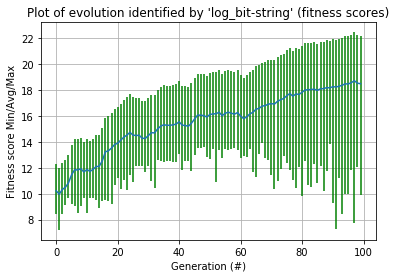

In [7]:
# Generate a graph showing the evolutionary results: fitness vs generations
%run ../../mlg-bachelor/bin/pyevolve_graph.py -i log_bit-string -2

Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
100 generations found !


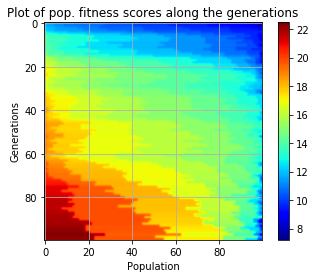

In [8]:
# Generate a heatmap of population fitness score distribution over generations
%run ../../mlg-bachelor/bin/pyevolve_graph.py -i log_bit-string -9